# **Dementia Patient Health,Prescriptions** 

## **Group number 18**

שיר ירון  
עדי חלילי  
שירה רוט 


<a id='top'></a>

<div>
<img src="https://github.com/adihalili/project1/blob/d11331e482fbdcb69ab6b38eed2d108a1343e0f8/dementia_pic1.jpg"/ width="800"/>
</div>


*Table of Contents:*
<b id="Top"> </b>  
1. [Geting to know+clearing the data](#1)
2. [first path](#2)
3. [Second path](#3)
4. [Third path](#4)
5. [summary & recommendations](#5)

### Geting to know the data:
- הסבר על העמודות שלה
- הצגת אחוז חולים בריאים-
- הצגת החוסר קורולציה 
- התמקדות בעמוד ההשכלה

מכיוון שראינו שאין גורם ישיר ובולט למקרה, החלטנו לחקור לעומק כל אחת מהעמודות ולהצליב מידע בינהן 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import array as arr

In [12]:
url="https://raw.githubusercontent.com/adihalili/project1/main/dementia_patients_health_data.csv"
dmn_df = pd.read_csv(url)
dmn_df.head(10)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
5,1,0.114028,94,94.546754,36.678071,66.592329,21.154863,Rivastigmine,1.5,67,...,Former Smoker,Positive,Mild Activity,Yes,1,No,Low-Carb Diet,Poor,Diabetes,1
6,1,0.016194,90,96.423361,37.024630,83.976553,11.350612,Donepezil,10.0,87,...,Never Smoked,Positive,Mild Activity,No,7,No,Mediterranean Diet,Poor,Diabetes,1
7,0,0.161158,98,92.007370,36.050294,69.653564,30.339413,NaN,NaN,66,...,Former Smoker,Negative,Mild Activity,No,9,Yes,Low-Carb Diet,Poor,Hypertension,0
8,0,0.015754,69,99.859490,36.955259,53.725078,36.629687,NaN,NaN,66,...,Former Smoker,Positive,Mild Activity,No,10,Yes,Mediterranean Diet,Poor,NaN,0
9,1,0.097340,64,90.319068,36.396286,58.366698,49.175758,Rivastigmine,3.0,87,...,Former Smoker,Positive,Sedentary,Yes,7,Yes,Balanced Diet,Good,Diabetes,1


In [3]:
dmn_df.shape

(1000, 24)

In [ ]:
dmn_df.columns

In [5]:
dmn_df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [13]:
dmn_df['Prescription'].replace(np.nan, "No medication was prescribed", inplace=True)
dmn_df['Dosage in mg'].replace(np.nan, 0, inplace=True)
dmn_df['Chronic_Health_Conditions'].replace(np.nan, "Not diagnosed with chronic illness", inplace=True)
dmn_df

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,No medication was prescribed,0.0,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,No medication was prescribed,0.0,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,No medication was prescribed,0.0,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,No medication was prescribed,0.0,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,Not diagnosed with chronic illness,1


In [ ]:
דבר ראשון רצינו לראות את התפלגות החולים בקרב הנבדקים:

Text(0.5, 1.0, 'Dementia among the subjects')

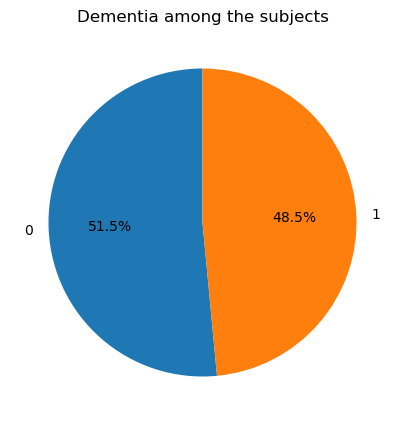

In [14]:
plt.figure(figsize=(7, 5))

dementia_counts = dmn_df['Dementia'].value_counts()

plt.pie(dementia_counts, labels=dementia_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Dementia among the subjects')


In [ ]:
רצינו בתור התחלה לעשות קורלציה לכל הדאטה, על מנת לראות קשרים בין הנתונים ולבחור במה להתעמק ולהתמקד: 

<Axes: >

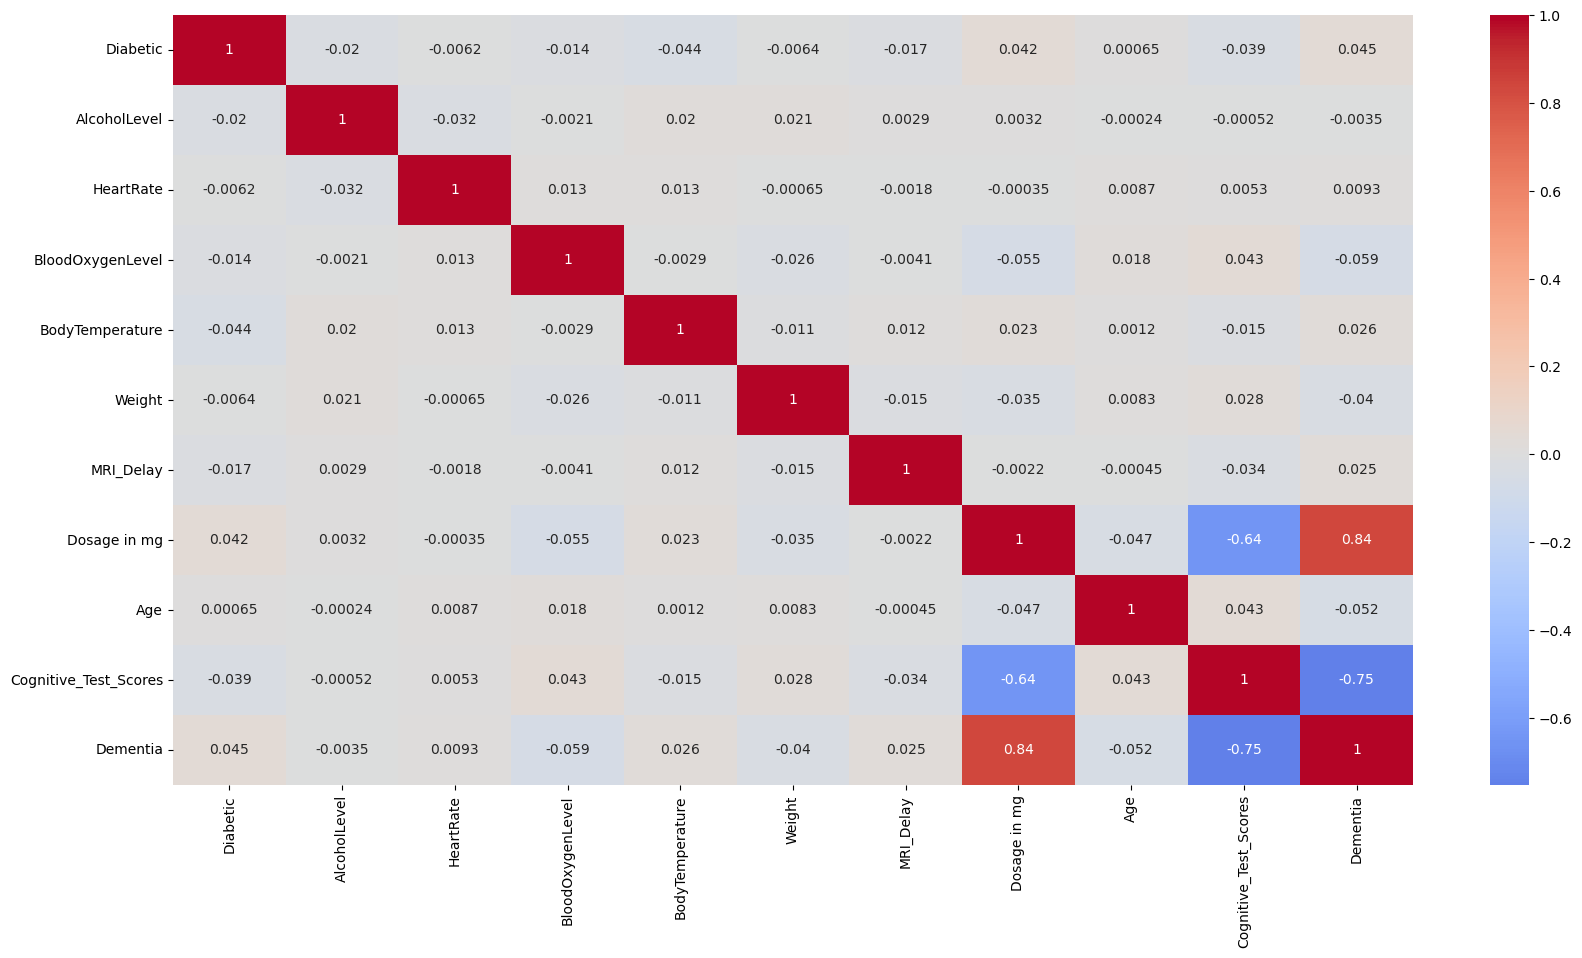

In [15]:
corrs= dmn_df.corr(method= 'kendall', numeric_only= True)
plt.figure(figsize=(20,10))
sns.heatmap(corrs, cmap= 'coolwarm', center= 0, annot = True)


In [ ]:
נשתמש בפונקציית get_dummies כדי לבדוק קולציה גם ביו העמודות הלא נומריות

In [16]:
dmn_df_dummies = pd.get_dummies(dmn_df)
dmn_df_dummies

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_Not diagnosed with chronic illness
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,0.0,60,10,...,False,False,True,False,False,True,True,False,False,False
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1,...,True,False,True,False,False,True,False,True,False,False
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,0.0,69,8,...,False,False,False,True,False,True,False,True,False,False
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5,...,True,True,False,False,False,True,False,False,True,False
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0,...,True,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,10.0,88,5,...,False,True,False,False,False,True,True,False,False,False
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,0.0,80,9,...,True,False,True,False,False,True,True,False,False,False
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,0.0,67,8,...,True,True,False,False,True,False,True,False,False,False
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,20.0,62,2,...,False,False,True,False,True,False,False,False,False,True


In [17]:
dmn_with_corr=dmn_df_dummies.corr()
dmn_with_corr

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,...,Medication_History_Yes,Nutrition_Diet_Balanced Diet,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Good,Sleep_Quality_Poor,Chronic_Health_Conditions_Diabetes,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_Not diagnosed with chronic illness
Diabetic,1.000000,-0.025616,-0.007188,-0.016575,-0.053851,-0.007501,-0.020378,0.049210,0.000923,-0.050019,...,-0.006733,-0.009839,0.003021,0.006793,0.055916,-0.055916,1.000000,-0.439574,-0.436213,-0.479236
AlcoholLevel,-0.025616,1.000000,-0.046341,-0.005562,0.030854,0.034553,0.004160,0.008300,-0.003081,-0.018716,...,-0.058951,-0.013902,0.032151,-0.018119,-0.033801,0.033801,-0.025616,-0.055492,0.002164,0.083755
HeartRate,-0.007188,-0.046341,1.000000,0.022283,0.015585,-0.001730,0.000169,-0.020054,0.011665,0.005493,...,0.027799,-0.001782,-0.083193,0.084472,-0.003392,0.003392,-0.007188,-0.020177,0.036131,-0.005509
BloodOxygenLevel,-0.016575,-0.005562,0.022283,1.000000,-0.007265,-0.041081,-0.005760,-0.062321,0.029565,0.070218,...,0.015129,-0.000840,-0.014534,0.015284,-0.017862,0.017862,-0.016575,-0.013011,0.013205,0.021495
BodyTemperature,-0.053851,0.030854,0.015585,-0.007265,1.000000,-0.017750,0.015953,0.045258,0.001586,-0.009791,...,0.022006,0.015300,0.023253,-0.038347,-0.011410,0.011410,-0.053851,0.030771,-0.007905,0.048587
Weight,-0.007501,0.034553,-0.001730,-0.041081,-0.017750,1.000000,-0.022890,-0.029248,0.011739,0.035821,...,-0.057993,-0.020632,-0.000085,0.020625,-0.005504,0.005504,-0.007501,-0.007676,0.031411,-0.012469
MRI_Delay,-0.020378,0.004160,0.000169,-0.005760,0.015953,-0.022890,1.000000,-0.035924,-0.002093,-0.052227,...,0.038864,0.008633,-0.013200,0.004527,-0.002877,0.002877,-0.020378,0.074871,-0.022546,-0.022941
Dosage in mg,0.049210,0.008300,-0.020054,-0.062321,0.045258,-0.029248,-0.035924,1.000000,-0.050452,-0.619073,...,-0.024600,-0.021741,0.021725,0.000048,-0.015638,0.015638,0.049210,-0.048884,-0.010629,-0.008032
Age,0.000923,-0.003081,0.011665,0.029565,0.001586,0.011739,-0.002093,-0.050452,1.000000,0.062640,...,-0.050559,-0.071585,-0.005764,0.076998,-0.003336,0.003336,0.000923,-0.008128,-0.042758,0.046621
Cognitive_Test_Scores,-0.050019,-0.018716,0.005493,0.070218,-0.009791,0.035821,-0.052227,-0.619073,0.062640,1.000000,...,0.013304,0.037301,-0.016316,-0.020917,0.004113,-0.004113,-0.050019,0.046618,0.015205,0.006928


<Axes: >

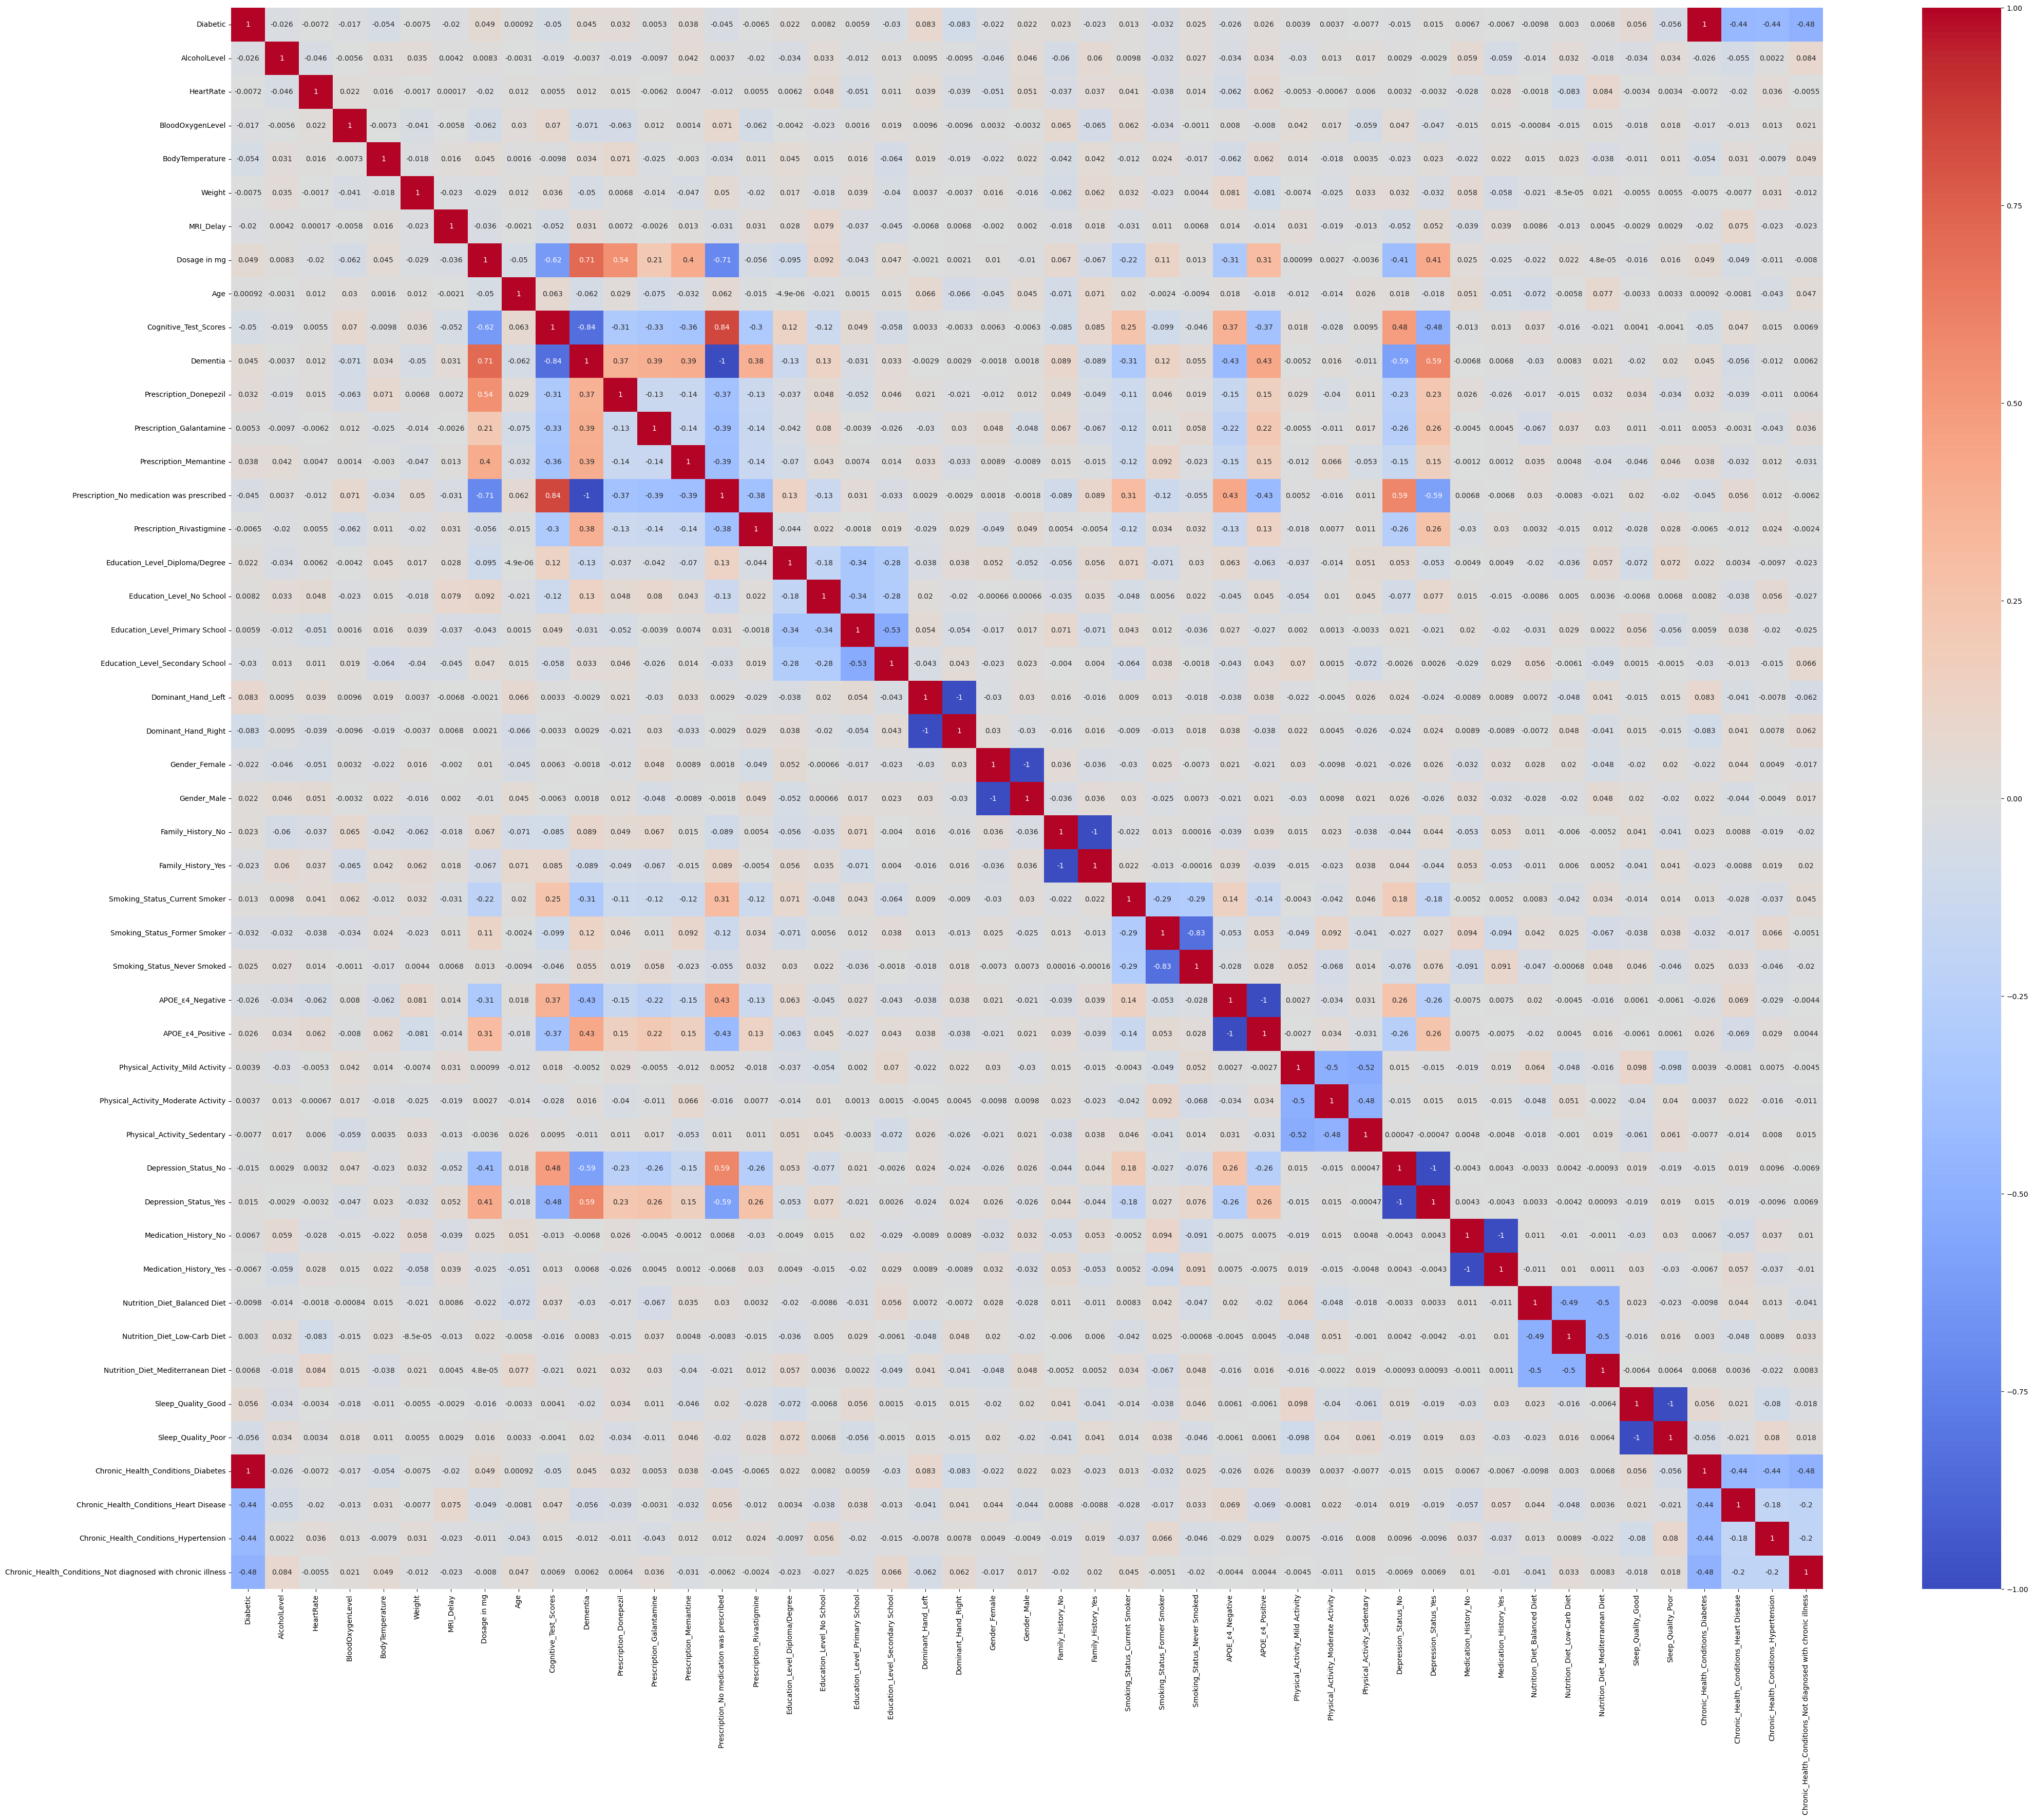

In [18]:
plt.figure(figsize=(50,40))
sns.heatmap(dmn_with_corr, cmap= 'coolwarm', center= 0, annot = True)

In [23]:
only_sick= dmn_df[dmn_df['Dementia']==1]
not_sick= dmn_df[dmn_df['Dementia']==0]
women= dmn_df[dmn_df['Gender']=='Female']
men= dmn_df[dmn_df['Gender']=='Male']


In [ ]:
חילקנו את הדאטה לכמה קבוצות שבהן נשתמש בהמשך

### first path - Genetics & Education :
- מי שעם גן יחלה יותר
- הקבלה להשכלה בקורולציה

השערה:  
אם לא למד בכלל  ונושא אם הגן - כמעט בטוח שיחלה

<Axes: xlabel='APOE_ε4', ylabel='count'>

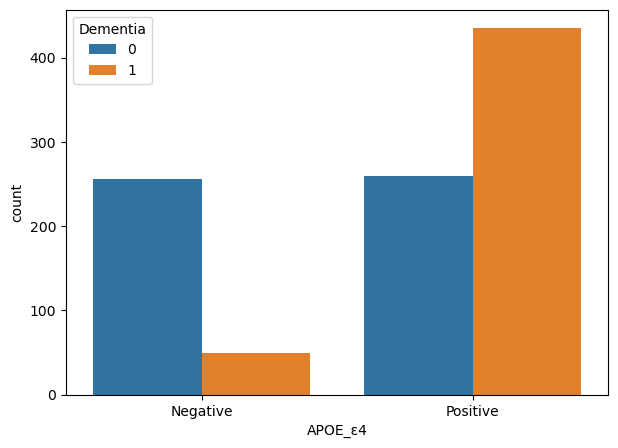

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='APOE_ε4', hue='Dementia', data=dmn_df)

Text(0.5, 1.0, 'The distribution of the gene\n among those who are not diagnosed with dementia')

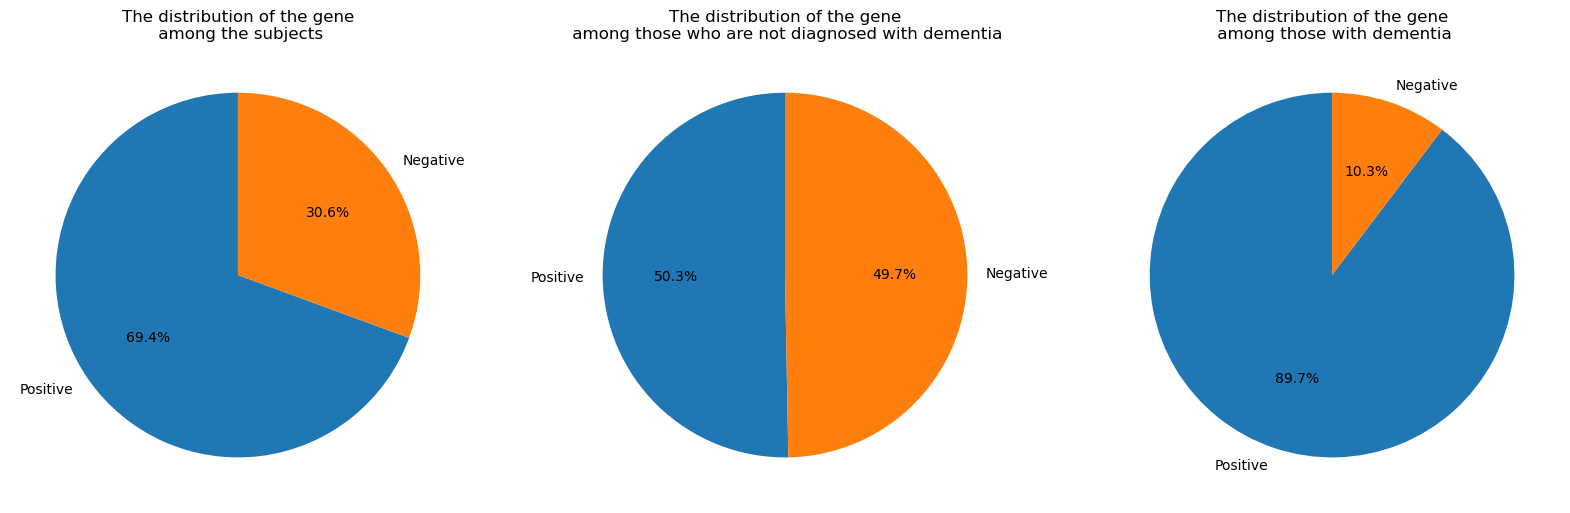

In [25]:

fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,12))

APOE_count_all = dmn_df['APOE_ε4'].value_counts()
APOE_count_sick = only_sick['APOE_ε4'].value_counts()
APOE_count_not_sick = not_sick['APOE_ε4'].value_counts()

ax1.pie(APOE_count_all, labels=APOE_count_all.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("The distribution of the gene\n among the subjects")

ax3.pie(APOE_count_sick, labels=APOE_count_sick.index, autopct='%1.1f%%', startangle=90)
ax3.set_title("The distribution of the gene\n among those with dementia")

ax2.pie(APOE_count_not_sick, labels=APOE_count_not_sick.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("The distribution of the gene\n among those who are not diagnosed with dementia")

In [26]:
dmn_df.pivot_table('Dementia', index= 'Education_Level', columns= 'APOE_ε4', aggfunc= 'mean')

APOE_ε4,Negative,Positive
Education_Level,,
Diploma/Degree,0.035088,0.515789
No School,0.225000,0.773913
Primary School,0.200000,0.590909
Secondary School,0.166667,0.640909


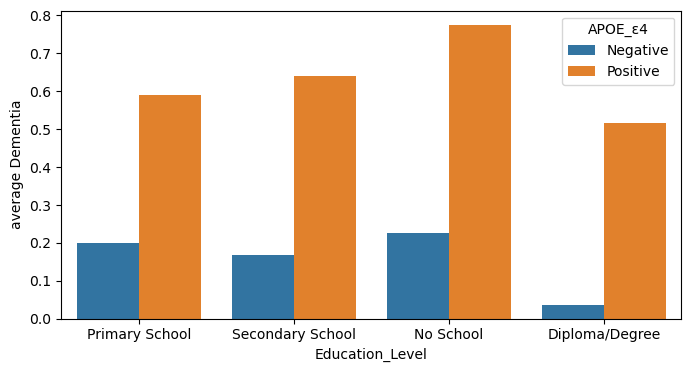

In [27]:
plt.figure(figsize=(8,4))
#plt.xticks(rotation=90)
ax = sns.barplot(data = dmn_df, x='Education_Level', y='Dementia', hue = 'APOE_ε4',errorbar=None)
ax.set(ylabel='average Dementia')
plt.legend(title='APOE_ε4', loc=('upper right')) #the legend position
plt.show()

### second path - Cognitive test scores & Education :
- חלוקה לחולים ובריאים
-  תוצאות המבחנים שונות בין החולים לבריאים (רק כדי להראות) 
- בדקנו איזה חלק מהציונים עשו אנשים בעלי רמות השכלה שונות
- גילינו שחולי דמנציה בעלי עבר של תואר , קיבלו ציונים גבוהים יותר במבחן הקוגנטיבי

השערה:  
יתכן ורקע אקדמי (ובתוכו הפעלת חשיבה ולימוד, רמת חייים או דרישה עצמית גבוהה) יכול להשפיע על היכולות הקוגנטיביות בקרב חולי דמנציה אמנם בדקנו על קבוצה מצומצמת( גם חולים וגם עם תואר ראשון) ולכן ממליצות לבדוק על רבוצה גדולה יותר של אנשים ולאמת או להפריך את הטענה שלנו

<Axes: xlabel='Education_Level', ylabel='count'>

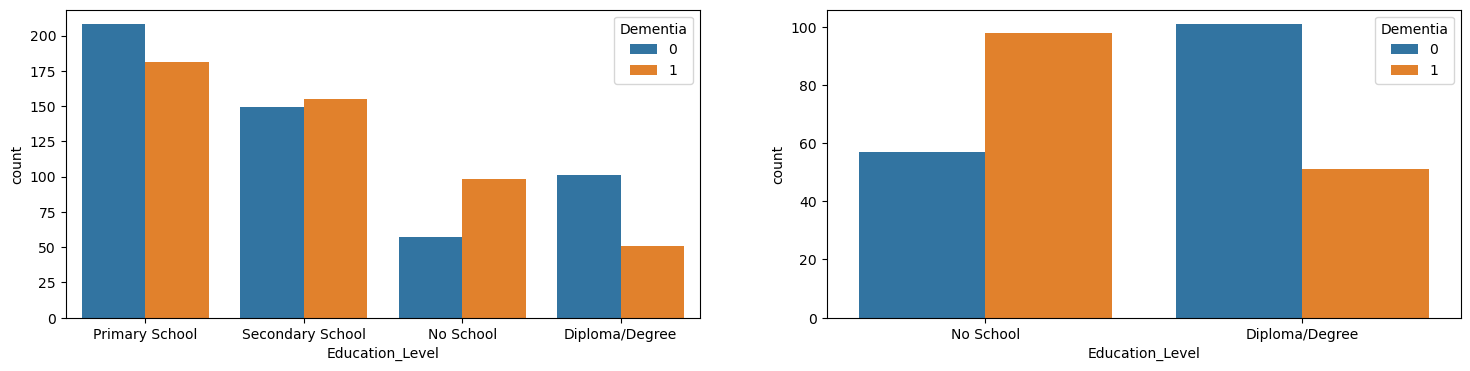

In [28]:
fig, axes = plt.subplots(figsize=(18, 4), ncols=2)
sns.countplot(data = dmn_df, x="Education_Level",hue="Dementia", ax = axes[0])
sns.countplot(data=dmn_df, x='Education_Level', hue='Dementia', order=['No School', 'Diploma/Degree'], ax = axes[1])

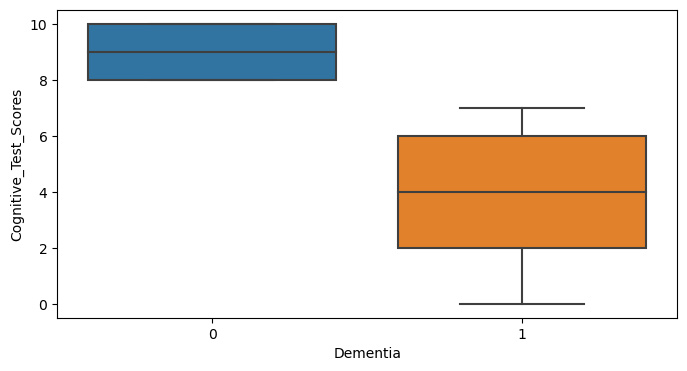

In [29]:
plt.figure(figsize = (8, 4), facecolor = "white")
sns.boxplot(dmn_df, x = 'Dementia', y = 'Cognitive_Test_Scores')
plt.show()

Text(0.5, 1.0, 'cognitive test scores among 50 subject who has diploma')

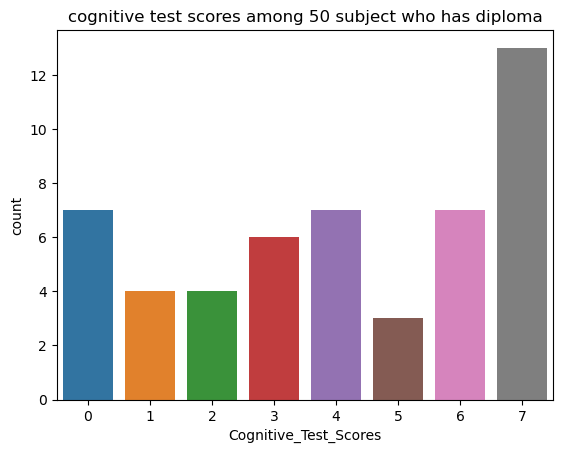

In [36]:
sns.countplot(only_sick[only_sick['Education_Level']=='Diploma/Degree'], x='Cognitive_Test_Scores')
plt.title('cognitive test scores among 50 subject who has diploma')
#kלהציג באחוזים - stat precent
#גרף של layerplot barchart horizon stack
#לחפש צידע על המבחן ואס לחשוב על אם להציג את שאר הציונים גל של הבריאים

### third path - Cognitive test scores & Alcohol level :
- חלוקה לחולים ובריאים
-  בהראנו שתוצאות המבחנים שונות בין החולים לבריאים (רק כדי להראות) 
- בדקנו איזה חלק מהציונים עשו אנשים בעלי רמות השכלה שונות
- גילינו שחולי דמנציה בעלי עבר של תואר שני, קיבלו ציונים גבוהים יותר במבחן הקוגנטיבי
